In [1]:
import sys
sys.path.append('unfolding')

import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import data_handler as dh
from omnifold import binned_omnifold, unbinned_omnifold

import energyflow as ef

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Settings

In [2]:
smearing_function = "calo"
N_events = 10000

## Data from Pythia & Herwig

In [3]:
#Data Loading
pythia = ef.zjets_delphes.load('Pythia26', num_data=N_events, cache_dir="./", pad=True) # Generator
herwig = ef.zjets_delphes.load('Herwig', num_data=N_events, cache_dir="./", pad=True)  # Detector

labels = [
    r"$p_\mathrm{Tjet}$", r"$y_\mathrm{jet}$", r"$\phi_\mathrm{jet}$",
    r"$m_\mathrm{jet}$", r"$m_\mathrm{groomed}$",r"$Mult_\mathrm{jet}$"
]

sim_data = np.column_stack((pythia['sim_jets'], pythia['sim_zgs'], pythia['sim_mults'])) # Detector Simulation 
mc_data = np.column_stack((pythia['gen_jets'], pythia['gen_zgs'], pythia['gen_mults'])) # Monte Carlo Truth Level
measured_data = np.column_stack((herwig['sim_jets'], herwig['sim_zgs'], herwig['sim_mults'])) # Experimental Data
true_data = np.column_stack((herwig['gen_jets'], herwig['gen_zgs'], herwig['gen_mults'])) # True Distribution


sim_data_df = pd.DataFrame(sim_data, columns=['sim_data_phi_Tjets', 'sim_data_y_jet', 'sim_data_phi_jet', 'sim_data_mass_jet', 'sim_data_mass_groomed', 'sim_data_mult_jet'])
mc_data_df = pd.DataFrame(mc_data, columns=['mc_data_phi_Tjets', 'mc_data_y_jet', 'mc_data_phi_jet', 'mc_data_mass_jet', 'mc_data_mass_groomed', 'mc_data_mult_jet'])
measured_data_df = pd.DataFrame(measured_data, columns=['measured_data_phi_Tjets', 'measured_data_y_jet', 'measured_data_phi_jet', 'measured_data_mass_jet', 'measured_data_mass_groomed', 'measured_data_mult_jet'])
true_data_df = pd.DataFrame(true_data, columns=['true_data_phi_Tjets', 'true_data_y_jet', 'true_data_phi_jet', 'true_data_mass_jet', 'true_data_mass_groomed', 'true_data_mult_jet'])

def check_data_integrity(df, name):
    if df.isnull().values.any():
        print(f"{name} contains None or NaN values.")
    else:
        print(f"{name} is intact with no None or NaN values.")

check_data_integrity(sim_data_df, "sim_data_df")
check_data_integrity(mc_data_df, "mc_data_df")
check_data_integrity(measured_data_df, "measured_data_df")
check_data_integrity(true_data_df, "true_data_df")

sim_data_df is intact with no None or NaN values.
mc_data_df is intact with no None or NaN values.
measured_data_df is intact with no None or NaN values.
true_data_df is intact with no None or NaN values.


In [4]:
print(sim_data.shape)
sim_data_df.head(10)

(10000, 6)


,sim_data_phi_Tjets,sim_data_y_jet,sim_data_phi_jet,sim_data_mass_jet,sim_data_mass_groomed,sim_data_mult_jet
0,354.686737,1.767519,2.911903,25.658556,0.137407,24.0
1,110.523918,2.777687,4.749348,16.669470,0.164015,11.0
2,247.493805,0.018533,3.868156,14.180049,0.415807,13.0
3,281.760956,1.477528,2.990853,45.823811,0.134590,35.0
4,842.730774,-0.997800,2.668631,24.059109,0.253641,25.0
5,174.467758,-0.580686,2.028580,5.777443,0.341487,13.0
6,192.427368,-1.166227,3.376636,18.640936,0.117018,28.0
7,706.933350,1.157630,1.448189,28.189669,0.210065,14.0
8,213.601578,0.594062,1.458285,13.297179,0.134950,20.0
9,145.767807,-0.090661,0.241015,12.511571,0.206547,25.0


In [5]:
print(mc_data.shape)
mc_data_df.head(10)

(10000, 6)


,mc_data_phi_Tjets,mc_data_y_jet,mc_data_phi_jet,mc_data_mass_jet,mc_data_mass_groomed,mc_data_mult_jet
0,345.097534,1.765164,2.913412,28.105358,0.131177,37.0
1,98.566879,2.763102,4.754829,14.882744,0.301911,22.0
2,248.040771,0.036231,3.867221,27.174328,0.373738,24.0
3,286.207184,1.469795,2.989452,46.210918,0.142383,37.0
4,825.522217,-0.994111,2.670494,30.762379,0.213502,34.0
5,204.744827,-0.580966,2.025737,9.447888,0.387665,20.0
6,185.778381,-1.167226,3.378391,24.233778,0.452374,42.0
7,657.501648,1.147679,1.437173,13.342625,0.404438,22.0
8,213.392029,0.594347,1.457821,15.031196,0.130219,29.0
9,190.711044,-0.107781,0.262027,19.692316,0.149198,37.0


In [6]:
print(measured_data.shape)
measured_data_df.head(10)

(10000, 6)


,measured_data_phi_Tjets,measured_data_y_jet,measured_data_phi_jet,measured_data_mass_jet,measured_data_mass_groomed,measured_data_mult_jet
0,270.594635,0.447279,3.313146,28.738432,0.118558,19.0
1,189.989609,-1.505765,1.072929,10.101647,0.245294,14.0
2,149.262680,1.882559,3.641870,28.075920,0.319542,26.0
3,235.242630,1.171762,5.087726,22.694643,0.124362,34.0
4,202.264374,2.595278,4.135831,17.703085,0.314071,8.0
5,131.039169,-3.267607,4.808189,23.276543,0.157140,11.0
6,273.555756,-1.581779,2.075692,10.022687,0.245318,18.0
7,313.727203,-0.806639,3.215070,59.994705,0.101724,46.0
8,118.560143,1.167436,0.901836,9.538355,0.449453,15.0
9,229.015152,0.239529,4.674316,5.005620,0.142838,6.0


In [7]:
print(true_data.shape)
true_data_df.head(10)

(10000, 6)


,true_data_phi_Tjets,true_data_y_jet,true_data_phi_jet,true_data_mass_jet,true_data_mass_groomed,true_data_mult_jet
0,242.346893,0.429793,3.350965,30.986725,0.125005,25.0
1,206.285110,-1.510244,1.078430,25.300236,0.235934,26.0
2,150.879181,1.877040,3.631568,28.079298,0.296135,30.0
3,241.471207,1.169754,5.090002,25.191778,0.131124,38.0
4,185.610504,2.581897,4.183091,13.962789,0.218676,23.0
5,105.447266,-0.613882,0.009018,12.177867,0.127167,19.0
6,283.568573,-1.580316,2.076777,20.094116,0.435532,28.0
7,301.158600,-0.815828,3.218812,61.296356,0.119014,57.0
8,136.889160,1.175115,0.893624,13.416775,0.493753,23.0
9,219.565628,0.241112,4.675387,14.550771,0.152154,11.0


In [8]:
sim_data_phi_Tjet, sim_data_y_jet, sim_data_phi_jet, sim_data_mass_jet, sim_data_mass_groomed, sim_data_mult_jet = [], [], [], [], [], []
mc_data_phi_Tjet, mc_data_y_jet, mc_data_phi_jet, mc_data_mass_jet, mc_data_mass_groomed, mc_data_mult_jet = [], [], [], [], [], []
measured_data_phi_Tjet, measured_data_y_jet, measured_data_phi_jet, measured_data_mass_jet, measured_data_mass_groomed, measured_data_mult_jet = [], [], [], [], [], []
true_data_phi_Tjet, true_data_y_jet, true_data_phi_jet, true_data_mass_jet, true_data_mass_groomed, true_data_mult_jet = [], [], [], [], [], []


for i in range(len(sim_data)):
    sim_data_phi_Tjet.append(sim_data[i][0])
    sim_data_y_jet.append(sim_data[i][1])
    sim_data_phi_jet.append(sim_data[i][2])
    sim_data_mass_jet.append(sim_data[i][3])
    sim_data_mass_groomed.append(sim_data[i][4])
    sim_data_mult_jet.append(sim_data[i][5])

for i in range(len(mc_data)):
    mc_data_phi_Tjet.append(mc_data[i][0])
    mc_data_y_jet.append(mc_data[i][1])
    mc_data_phi_jet.append(mc_data[i][2])
    mc_data_mass_jet.append(mc_data[i][3])
    mc_data_mass_groomed.append(mc_data[i][4])
    mc_data_mult_jet.append(mc_data[i][5])

for i in range(len(measured_data)):
    measured_data_phi_Tjet.append(measured_data[i][0])
    measured_data_y_jet.append(measured_data[i][1])
    measured_data_phi_jet.append(measured_data[i][2])
    measured_data_mass_jet.append(measured_data[i][3])
    measured_data_mass_groomed.append(measured_data[i][4])
    measured_data_mult_jet.append(measured_data[i][5])

for i in range(len(true_data)):
    true_data_phi_Tjet.append(true_data[i][0])
    true_data_y_jet.append(true_data[i][1])
    true_data_phi_jet.append(true_data[i][2])
    true_data_mass_jet.append(true_data[i][3])
    true_data_mass_groomed.append(true_data[i][4])
    true_data_mult_jet.append(true_data[i][5])


#Binned Data
bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet  = 41, 0, 800
bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet = 41, -4, 4
bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet = 31, 0.0, 6.2
bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet = 41, 0, 80
bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed = 26, 0, 0.5
bins_mult, bin_low_mult, bin_high_mult = 41, 0, 80

sim_data_phi_Tjet_binned = ROOT.TH1D("sim_phi_Tjet_hist", "sim_phi_Tjet_hist", bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet)
sim_data_y_jet_binned = ROOT.TH1D("sim_y_jet_hist", "sim_y_jet_hist", bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet)
sim_data_phi_jet_binned = ROOT.TH1D("sim_phi_jet_hist", "sim_phi_jet_hist", bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet)
sim_data_mass_jet_binned = ROOT.TH1D("sim_mass_jet_hist", "sim_mass_jet_hist", bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet)
sim_data_mass_groomed_binned = ROOT.TH1D("sim_mass_groomed_hist", "sim_mass_groomed_hist", bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed)
sim_data_mult_jet_binned = ROOT.TH1D("sim_mult_jet_hist", "sim_mult_jet_hist", bins_mult, bin_low_mult, bin_high_mult)

mc_data_phi_Tjet_binned = ROOT.TH1D("mc_phi_Tjet_hist", "mc_phi_Tjet_hist", bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet)
mc_data_y_jet_binned = ROOT.TH1D("mc_y_jet_hist", "mc_y_jet_hist", bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet)
mc_data_phi_jet_binned = ROOT.TH1D("mc_phi_jet_hist", "mc_phi_jet_hist", bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet)
mc_data_mass_jet_binned = ROOT.TH1D("mc_mass_jet_hist", "mc_mass_jet_hist", bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet)
mc_data_mass_groomed_binned = ROOT.TH1D("mc_mass_groomed_hist", "mc_mass_groomed_hist", bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed)
mc_data_mult_jet_binned = ROOT.TH1D("mc_mult_jet_hist", "mc_mult_jet_hist", bins_mult, bin_low_mult, bin_high_mult)

measured_data_phi_Tjet_binned = ROOT.TH1D("measured_phi_Tjet_hist", "measured_phi_Tjet_hist", bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet)
measured_data_y_jet_binned = ROOT.TH1D("measured_y_jet_hist", "measured_y_jet_hist", bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet)
measured_data_phi_jet_binned = ROOT.TH1D("measured_phi_jet_hist", "measured_phi_jet_hist", bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet)
measured_data_mass_jet_binned = ROOT.TH1D("measured_mass_jet_hist", "measured_mass_jet_hist", bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet)
measured_data_mass_groomed_binned = ROOT.TH1D("measured_mass_groomed_hist", "measured_mass_groomed_hist", bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed)
measured_data_mult_jet_binned = ROOT.TH1D("measured_mult_jet_hist", "measured_mult_jet_hist", bins_mult, bin_low_mult, bin_high_mult)

true_data_phi_Tjet_binned = ROOT.TH1D("true_phi_Tjet_hist", "true_phi_Tjet_hist", bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet)
true_data_y_jet_binned = ROOT.TH1D("true_y_jet_hist", "true_y_jet_hist", bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet)
true_data_phi_jet_binned = ROOT.TH1D("true_phi_jet_hist", "true_phi_jet_hist", bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet)
true_data_mass_jet_binned = ROOT.TH1D("true_mass_jet_hist", "true_mass_jet_hist", bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet)
true_data_mass_groomed_binned = ROOT.TH1D("true_mass_groomed_hist", "true_mass_groomed_hist", bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed)
true_data_mult_jet_binned = ROOT.TH1D("true_mult_jet_hist", "true_mult_jet_hist", bins_mult, bin_low_mult, bin_high_mult)



response_phi_Tjet = ROOT.RooUnfoldResponse(bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet, bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet)
response_y_jet = ROOT.RooUnfoldResponse(bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet, bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet)
response_phi_jet = ROOT.RooUnfoldResponse(bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet, bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet)
response_mass_jet = ROOT.RooUnfoldResponse(bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet, bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet)
response_mass_groomed = ROOT.RooUnfoldResponse(bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed, bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed)
response_mult_jet = ROOT.RooUnfoldResponse(bins_mult, bin_low_mult, bin_high_mult, bins_mult, bin_low_mult, bin_high_mult)


#Unbinned data and response matrices
def build_data(
        response, 
        initial_mc_list, 
        initial_sim_list, 
        initial_true_list, 
        initial_measured_list, 
        mc_hist, 
        sim_hist, 
        true_hist, 
        measured_hist, 
        bin_low, 
        bin_high
    ):

    pass_reco = []
    pass_truth = []
    unbinned_sim_data = []
    unbinned_mc_data  = []
    unbinned_true_data = []
    unbinned_measured_data = []

    for MC, sim, true, measured in zip(initial_mc_list, initial_sim_list, initial_true_list, initial_measured_list):
        pass_reco.append(True)
        pass_truth.append(True)

        unbinned_mc_data.append(MC)
        unbinned_sim_data.append(sim)
        unbinned_true_data.append(true)
        unbinned_measured_data.append(measured)

        response.Fill(sim, MC)

        mc_hist.Fill(MC)
        sim_hist.Fill(sim)
        true_hist.Fill(true)
        measured_hist.Fill(measured)

        pass_reco_mask = np.array(pass_reco)
        pass_truth_mask = np.array(pass_truth)

    unbinned_sim_data = np.array(unbinned_sim_data, dtype=np.float32)
    unbinned_mc_data = np.array(unbinned_mc_data, dtype=np.float32)
    unbinned_true_data = np.array(unbinned_true_data, dtype=np.float32)
    unbinned_measured_data = np.array(unbinned_measured_data, dtype=np.float32)

    pass_reco_mask = np.array(pass_reco, dtype=bool)
    pass_truth_mask = np.array(pass_truth, dtype=bool)


    return response, unbinned_mc_data, unbinned_sim_data, unbinned_true_data, unbinned_measured_data, pass_reco_mask, pass_truth_mask, mc_hist, sim_hist, true_hist, measured_hist


Error in <TCling::LoadPCM>: ROOT PCM /global/u2/t/trevin/miniconda3/envs/omni/lib/libRooFitJSONInterface_rdict.pcm file does not exist
Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libASImageGui_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libASImage_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libEGPythia8_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libEG_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libEve_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libFFTW_rdict.pcm

Info in <TCling::LoadPCM>: In-memory ROOT PCM candidate /global/u2/t/trevin/.conda/envs/cernroot/lib/libFITSIO_rdict.pcm

Info in <TCl

In [9]:
phi_Tjet_response, phi_Tjet_mc_data, phi_Tjet_sim_data, phi_Tjet_true_data, phi_Tjet_measured_data, phi_Tjet_pass_reco, phi_Tjet_pass_truth, phi_Tjet_mc_hist, phi_Tjet_sim_hist, phi_Tjet_true_hist, phi_Tjet_measured_hist = build_data(
    response_phi_Tjet,
    mc_data_phi_Tjet,
    sim_data_phi_Tjet,
    true_data_phi_Tjet,
    measured_data_phi_Tjet,
    sim_data_phi_Tjet_binned,
    mc_data_phi_Tjet_binned,
    true_data_phi_Tjet_binned,
    measured_data_phi_Tjet_binned,
    bin_low_phi_Tjet,
    bin_high_phi_Tjet,
)


y_jet_response, y_jet_mc_data, y_jet_sim_data, y_jet_true_data, y_jet_measured_data, y_jet_pass_reco, y_jet_pass_truth, y_jet_mc_hist, y_jet_sim_hist, y_jet_true_hist, y_jet_measured_hist = build_data(
    response_y_jet,
    mc_data_y_jet,
    sim_data_y_jet,
    true_data_y_jet,
    measured_data_y_jet,
    sim_data_y_jet_binned,
    mc_data_y_jet_binned,
    true_data_y_jet_binned,
    measured_data_y_jet_binned,
    bin_low_y_Tjet,
    bin_high_y_Tjet,
)

phi_jet_response, phi_jet_mc_data, phi_jet_sim_data, phi_jet_true_data, phi_jet_measured_data, phi_jet_pass_reco, phi_jet_pass_truth, phi_jet_mc_hist, phi_jet_sim_hist, phi_jet_true_hist, phi_jet_measured_hist = build_data(
    response_phi_jet,
    mc_data_phi_jet,
    sim_data_phi_jet,
    true_data_phi_jet,
    measured_data_phi_jet,
    sim_data_phi_jet_binned,
    mc_data_phi_jet_binned,
    true_data_phi_jet_binned,
    measured_data_phi_jet_binned,
    bin_low_phi_jet,
    bin_high_phi_jet,
)

mass_jet_response, mass_jet_mc_data, mass_jet_sim_data, mass_jet_true_data, mass_jet_measured_data, mass_jet_pass_reco, mass_jet_pass_truth, mass_jet_mc_hist, mass_jet_sim_hist, mass_jet_true_hist, mass_jet_measured_hist = build_data(
    response_mass_jet,
    mc_data_mass_jet,
    sim_data_mass_jet,
    true_data_mass_jet,
    measured_data_mass_jet,
    sim_data_mass_jet_binned,
    mc_data_mass_jet_binned,
    true_data_mass_jet_binned,
    measured_data_mass_jet_binned,
    bin_low_mass_jet,
    bin_high_mass_jet,
)

mass_groomed_response, mass_groomed_mc_data, mass_groomed_sim_data, mass_groomed_true_data, mass_groomed_measured_data, mass_groomed_pass_reco, mass_groomed_pass_truth, mass_groomed_mc_hist, mass_groomed_sim_hist, mass_groomed_true_hist, mass_groomed_measured_hist = build_data(
    response_mass_groomed,
    mc_data_mass_groomed,
    sim_data_mass_groomed,
    true_data_mass_groomed,
    measured_data_mass_groomed,
    sim_data_mass_groomed_binned,
    mc_data_mass_groomed_binned,
    true_data_mass_groomed_binned,
    measured_data_mass_groomed_binned,
    bin_low_mass_groomed,
    bin_high_mass_groomed,
)

mult_jet_response, mult_jet_mc_data, mult_jet_sim_data, mult_jet_true_data, mult_jet_measured_data, mult_jet_pass_reco, mult_jet_pass_truth, mult_jet_mc_hist, mult_jet_sim_hist, mult_jet_true_hist, mult_jet_measured_hist = build_data(
    response_mult_jet,
    mc_data_mult_jet,
    sim_data_mult_jet,
    true_data_mult_jet,
    measured_data_mult_jet,
    sim_data_mult_jet_binned,
    mc_data_mult_jet_binned,
    true_data_mult_jet_binned,
    measured_data_mult_jet_binned,
    bin_low_mult,
    bin_high_mult,
)


Warning in <TLegend::Paint>: Legend too large to be automatically placed; a default position is used


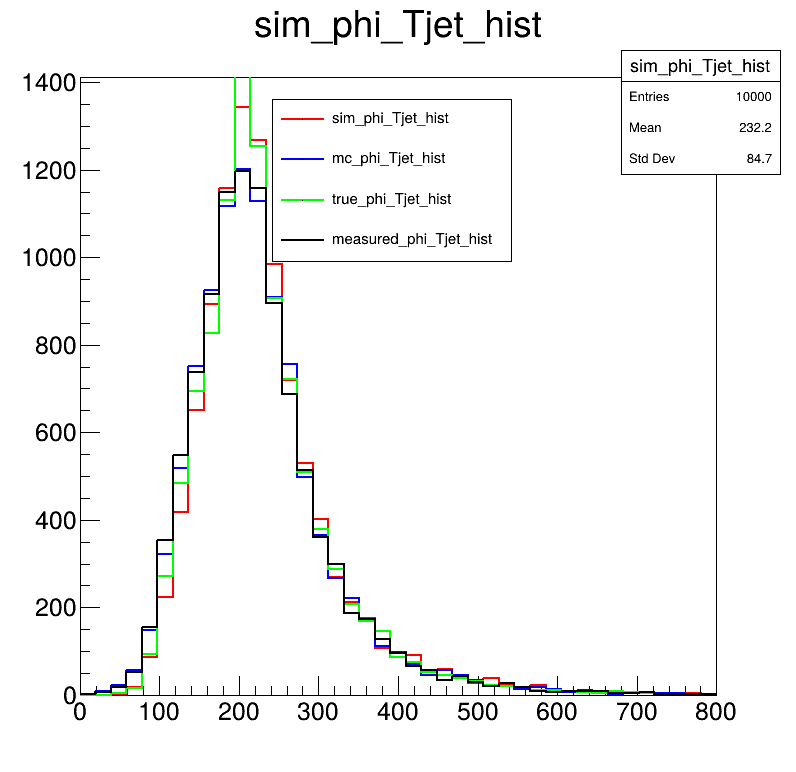

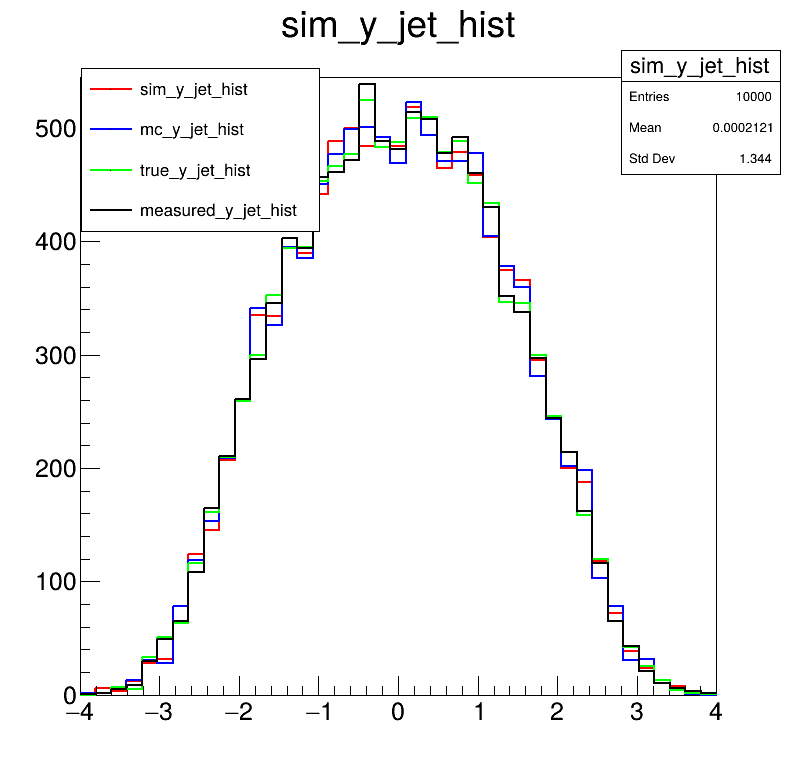

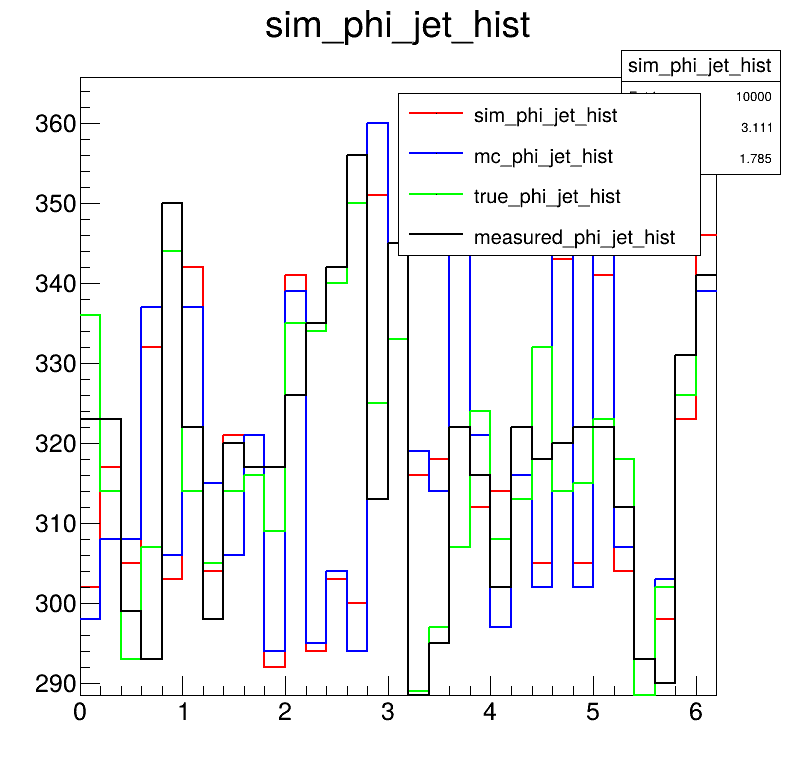

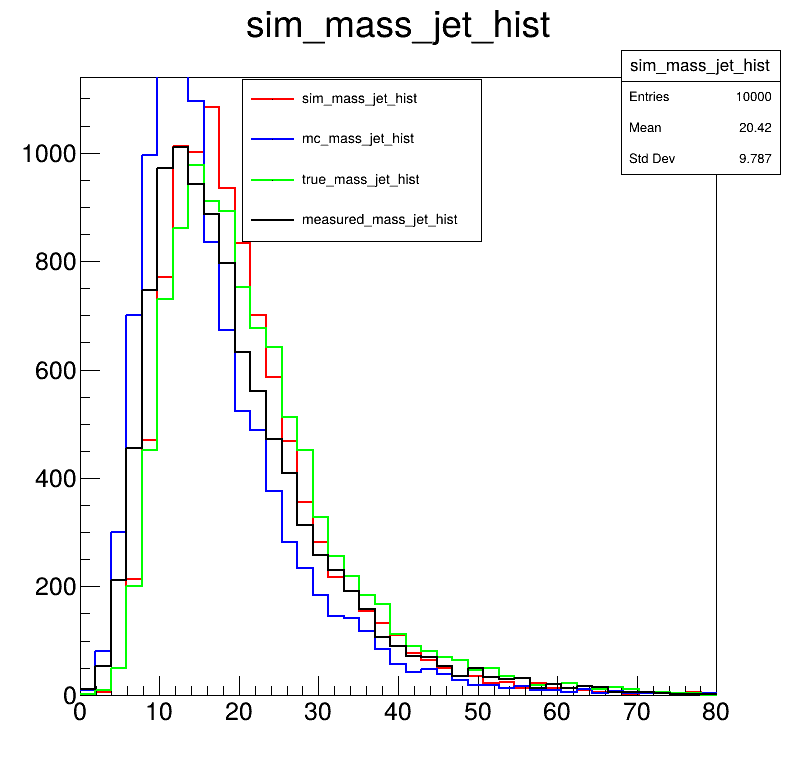

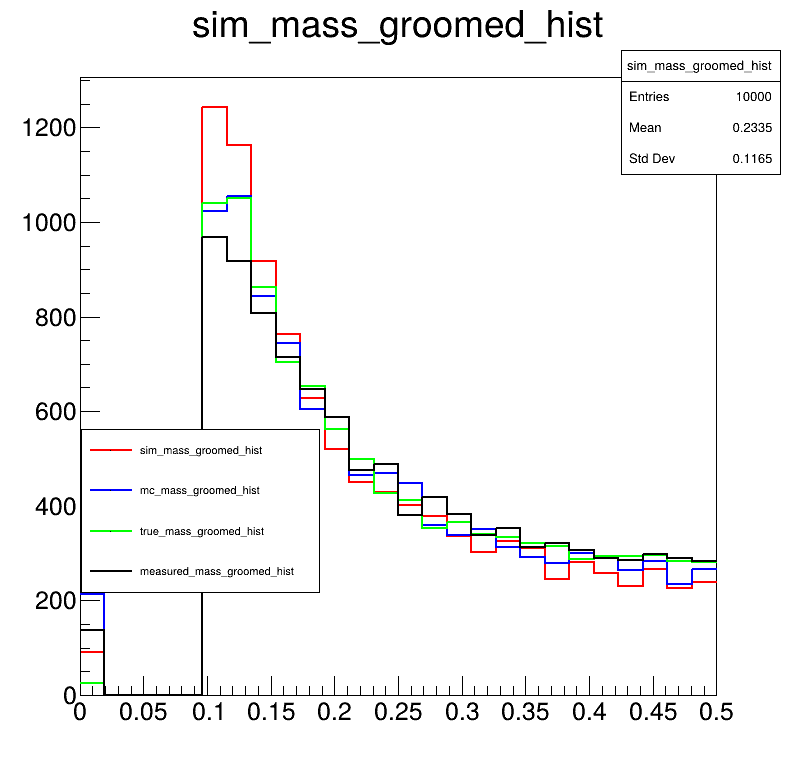

In [10]:
phi_Tjet_canvas = ROOT.TCanvas("phi_Tjet_canvas", "phi_Tjet_canvas", 800, 800)
phi_Tjet_mc_hist.SetLineColor(ROOT.kRed)
phi_Tjet_mc_hist.SetLineWidth(2)
phi_Tjet_mc_hist.Draw("hist")
phi_Tjet_sim_hist.SetLineColor(ROOT.kBlue)
phi_Tjet_sim_hist.SetLineWidth(2)
phi_Tjet_sim_hist.Draw("hist same")
phi_Tjet_true_hist.SetLineColor(ROOT.kGreen)
phi_Tjet_true_hist.SetLineWidth(2)
phi_Tjet_true_hist.Draw("hist same")
phi_Tjet_measured_hist.SetLineColor(ROOT.kBlack)
phi_Tjet_measured_hist.SetLineWidth(2)
phi_Tjet_measured_hist.Draw("hist same")
phi_Tjet_canvas.BuildLegend()
phi_Tjet_canvas.Draw()

y_jet_canvas = ROOT.TCanvas("y_jet_canvas", "y_jet_canvas", 800, 800)
y_jet_mc_hist.SetLineColor(ROOT.kRed)
y_jet_mc_hist.SetLineWidth(2)
y_jet_mc_hist.Draw("hist")
y_jet_sim_hist.SetLineColor(ROOT.kBlue)
y_jet_sim_hist.SetLineWidth(2)
y_jet_sim_hist.Draw("hist same")
y_jet_true_hist.SetLineColor(ROOT.kGreen)
y_jet_true_hist.SetLineWidth(2)
y_jet_true_hist.Draw("hist same")
y_jet_measured_hist.SetLineColor(ROOT.kBlack)
y_jet_measured_hist.SetLineWidth(2)
y_jet_measured_hist.Draw("hist same")
y_jet_canvas.BuildLegend()
y_jet_canvas.Draw()

phi_jet_canvas = ROOT.TCanvas("phi_jet_canvas", "phi_jet_canvas", 800, 800)
phi_jet_mc_hist.SetLineColor(ROOT.kRed)
phi_jet_mc_hist.SetLineWidth(2)
phi_jet_mc_hist.Draw("hist")
phi_jet_sim_hist.SetLineColor(ROOT.kBlue)
phi_jet_sim_hist.SetLineWidth(2)
phi_jet_sim_hist.Draw("hist same")
phi_jet_true_hist.SetLineColor(ROOT.kGreen)
phi_jet_true_hist.SetLineWidth(2)
phi_jet_true_hist.Draw("hist same")
phi_jet_measured_hist.SetLineColor(ROOT.kBlack)
phi_jet_measured_hist.SetLineWidth(2)
phi_jet_measured_hist.Draw("hist same")
phi_jet_canvas.BuildLegend()
phi_jet_canvas.Draw()

mass_jet_canvas = ROOT.TCanvas("mass_jet_canvas", "mass_jet_canvas", 800, 800)
mass_jet_mc_hist.SetLineColor(ROOT.kRed)
mass_jet_mc_hist.SetLineWidth(2)
mass_jet_mc_hist.Draw("hist")
mass_jet_sim_hist.SetLineColor(ROOT.kBlue)
mass_jet_sim_hist.SetLineWidth(2)
mass_jet_sim_hist.Draw("hist same")
mass_jet_true_hist.SetLineColor(ROOT.kGreen)
mass_jet_true_hist.SetLineWidth(2)
mass_jet_true_hist.Draw("hist same")
mass_jet_measured_hist.SetLineColor(ROOT.kBlack)
mass_jet_measured_hist.SetLineWidth(2)
mass_jet_measured_hist.Draw("hist same")
mass_jet_canvas.BuildLegend()
mass_jet_canvas.Draw()

mass_groomed_canvas = ROOT.TCanvas("mass_groomed_canvas", "mass_groomed_canvas", 800, 800)
mass_groomed_mc_hist.SetLineColor(ROOT.kRed)
mass_groomed_mc_hist.SetLineWidth(2)
mass_groomed_mc_hist.Draw("hist")
mass_groomed_sim_hist.SetLineColor(ROOT.kBlue)
mass_groomed_sim_hist.SetLineWidth(2)
mass_groomed_sim_hist.Draw("hist same")
mass_groomed_true_hist.SetLineColor(ROOT.kGreen)
mass_groomed_true_hist.SetLineWidth(2)
mass_groomed_true_hist.Draw("hist same")
mass_groomed_measured_hist.SetLineColor(ROOT.kBlack)
mass_groomed_measured_hist.SetLineWidth(2)
mass_groomed_measured_hist.Draw("hist same")
mass_groomed_canvas.BuildLegend()
mass_groomed_canvas.Draw()






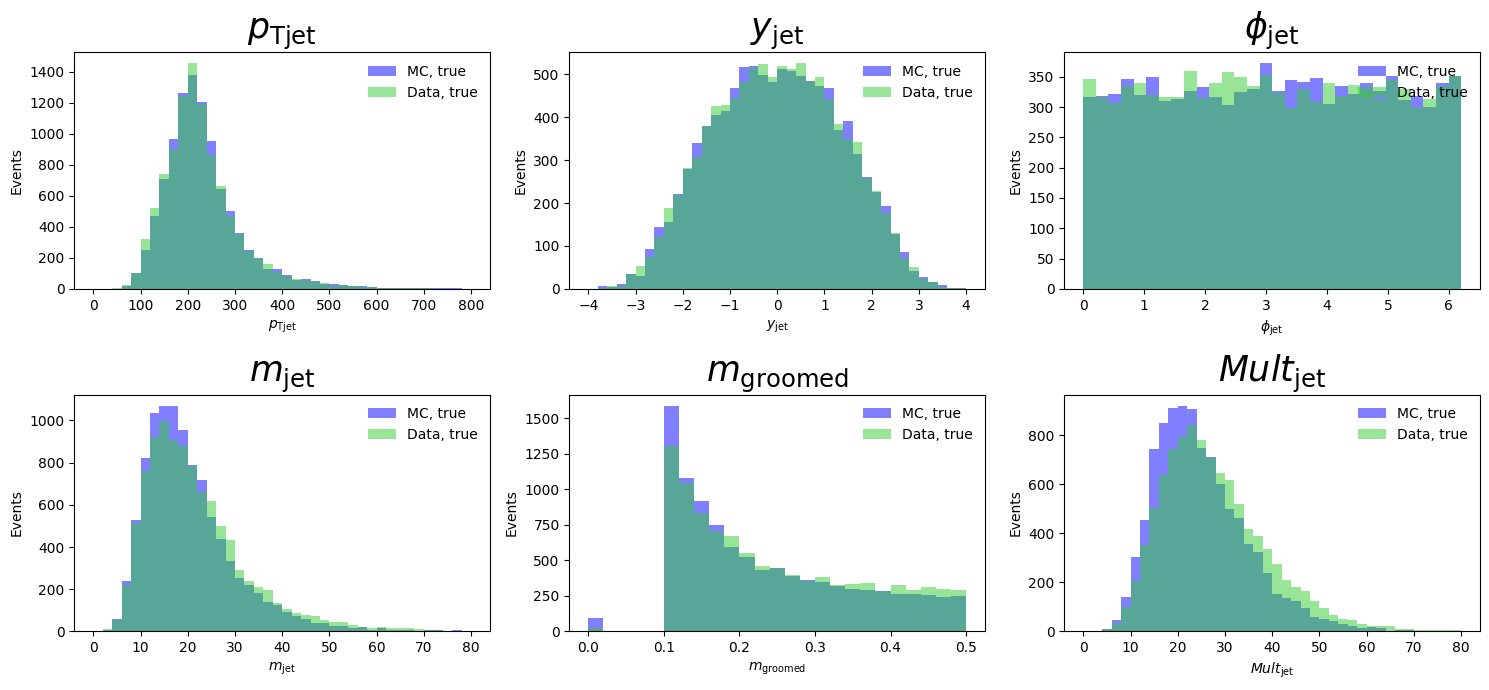

In [11]:
binning = [ #simple plotting bins
np.linspace(0, 800,  41),   #jet pT
np.linspace(-4, 4, 41),     #jet y
np.linspace(0.0, 6.2, 31),  #jet phi
np.linspace(0, 80,  41),    #jet mass
np.linspace(0, 0.5, 26),    # groomed mass
np.linspace(0, 80, 41)      # multiplicity
]

labels = [
    r"$p_\mathrm{Tjet}$",
    r"$y_\mathrm{jet}$",
    r"$\phi_\mathrm{jet}$",
    r"$m_\mathrm{jet}$",
    r"$m_\mathrm{groomed}$",
    r"$Mult_\mathrm{jet}$"
]
    

N = len(binning)

fig, axes = plt.subplots(2, 3, figsize=(15,7))

for i,ax in enumerate(axes.ravel()):
    if (i >= N): break
    _,_,_=ax.hist(mc_data[:,i], binning[i], color='blue', alpha=0.5, label="MC, true")
    _,_,_=ax.hist(true_data[:,i], binning[i], color='limegreen', alpha=0.5, label="Data, true")

    ax.set_title(labels[i],fontsize=25)
    ax.set_xlabel(labels[i])
    ax.set_ylabel("Events")
    ax.legend(frameon=False)
    
fig.tight_layout()

## Binned Omnifold w/ Decision Trees

In [12]:
num_iterations = 5

In [13]:
def binned_unfold(response, measured_hist, num_iterations, MC_bins, MC_low, MC_high):
    binned_weights, MC_entries, _, _ = binned_omnifold(response, measured_hist, num_iterations)
    
    omnifold_MC_hist_binned, omnifold_MC_bin_edges_binned = np.histogram(
        MC_entries.flatten(), 
        weights=binned_weights[-1][1], 
        bins=MC_bins, 
        range=[MC_low, MC_high]
    )
    omnifold_MC_bin_centers_binned = (omnifold_MC_bin_edges_binned[:-1] + omnifold_MC_bin_edges_binned[1:]) / 2

    efficiencies = response.Vefficiency()
    efficiencies_np = np.empty(efficiencies.GetNoElements())

    for i in range(efficiencies.GetNoElements()):
        efficiencies_np[i] = efficiencies[i]

    omnifold_MC_hist_binned = np.divide(
        omnifold_MC_hist_binned, 
        efficiencies_np, 
        out=np.zeros_like(omnifold_MC_hist_binned, dtype=np.float32),
        where=(
            (efficiencies_np != 0) & 
            (~np.isnan(efficiencies_np)) & 
            (~np.isinf(efficiencies_np))
        )
    )
    return omnifold_MC_hist_binned, omnifold_MC_bin_centers_binned

# Process each dataset
binned_datasets = [
    (phi_Tjet_response, measured_data_phi_Tjet_binned, bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet),
    (y_jet_response, measured_data_y_jet_binned, bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet),
    (phi_jet_response, measured_data_phi_jet_binned, bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet),
    (mass_jet_response, measured_data_mass_jet_binned, bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet),
    (mass_groomed_response, measured_data_mass_groomed_binned, bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed),
    (mult_jet_response, measured_data_mult_jet_binned, bins_mult, bin_low_mult, bin_high_mult)
]

binned_results = []
for response, measured_hist,bins, bins_low, bins_high in binned_datasets:
    result = binned_unfold(response, measured_hist, num_iterations, bins, bins_low, bins_high)
    binned_results.append(result)


Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4


## Unbinned Omnifold w/ Decision Trees

In [14]:
def unbinned_unfold(unbinned_mc_data, unbinned_sim_data, unbinned_measured_data, pass_reco_mask, pass_truth_mask, num_iterations):
    unbinned_weights, MC_entries_unbinned, sim_entries_unbinned, pass_reco_mask_unbinned = unbinned_omnifold(
        unbinned_mc_data,
        unbinned_sim_data,
        unbinned_measured_data,
        pass_reco_mask,
        pass_truth_mask,
        num_iterations
    )

    return unbinned_weights, MC_entries_unbinned, sim_entries_unbinned, pass_reco_mask_unbinned

unbinned_datasets = [
    (phi_Tjet_mc_data, phi_Tjet_sim_data, phi_Tjet_measured_data, phi_Tjet_pass_reco, phi_Tjet_pass_truth),
    (y_jet_mc_data, y_jet_sim_data, y_jet_measured_data, y_jet_pass_reco, y_jet_pass_truth),
    (phi_jet_mc_data, phi_jet_sim_data, phi_jet_measured_data, phi_jet_pass_reco, phi_jet_pass_truth),
    (mass_jet_mc_data, mass_jet_sim_data, mass_jet_measured_data, mass_jet_pass_reco, mass_jet_pass_truth),
    (mass_groomed_mc_data, mass_groomed_sim_data, mass_groomed_measured_data, mass_groomed_pass_reco, mass_groomed_pass_truth),
    (mult_jet_mc_data, mult_jet_sim_data, mult_jet_measured_data, mult_jet_pass_reco, mult_jet_pass_truth),
]

unbinned_results = []
for mc_data, sim_data, measured_data, pass_reco, pass_truth in unbinned_datasets:
    result = unbinned_unfold(mc_data, sim_data, measured_data, pass_reco, pass_truth, num_iterations)
    unbinned_results.append(result)


Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4
Starting iteration 0
Starting iteration 1
Starting iteration 2
Starting iteration 3
Starting iteration 4


## Iterative Baysian Unfolding

In [15]:
IBU_RooUnfold_phi_Tjet = ROOT.RooUnfoldBayes(response_phi_Tjet, phi_Tjet_mc_hist, num_iterations)
hReco_phi_Tjet = IBU_RooUnfold_phi_Tjet.Hreco()
roounfold_data_phi_Tjet, roounfold_data_phi_Tjet_x = dh.TH1_to_numpy(hReco_phi_Tjet)

IBU_RooUnfold_y_jet = ROOT.RooUnfoldBayes(response_y_jet, y_jet_mc_hist, num_iterations)
hReco_y_jet = IBU_RooUnfold_y_jet.Hreco()
roounfold_data_y_jet, roounfold_data_y_jet_x = dh.TH1_to_numpy(hReco_y_jet)

IBU_RooUnfold_phi_jet = ROOT.RooUnfoldBayes(response_phi_jet, phi_jet_mc_hist, num_iterations)
hReco_phi_jet = IBU_RooUnfold_phi_jet.Hreco()
roounfold_data_phi_jet, roounfold_data_phi_jet_x = dh.TH1_to_numpy(hReco_phi_jet)

IBU_RooUnfold_mass_jet = ROOT.RooUnfoldBayes(response_mass_jet, mass_jet_mc_hist, num_iterations)
hReco_mass_jet = IBU_RooUnfold_mass_jet.Hreco()
roounfold_data_mass_jet, roounfold_data_mass_jet_x = dh.TH1_to_numpy(hReco_mass_jet)

IBU_RooUnfold_mass_groomed = ROOT.RooUnfoldBayes(response_mass_groomed, mass_groomed_mc_hist, num_iterations)
hReco_mass_groomed = IBU_RooUnfold_mass_groomed.Hreco()
roounfold_data_mass_groomed, roounfold_data_mass_groomed_x = dh.TH1_to_numpy(hReco_mass_groomed)

IBU_RooUnfold_mult_jet = ROOT.RooUnfoldBayes(response_mult_jet, mult_jet_mc_hist, num_iterations)
hReco_mult_jet = IBU_RooUnfold_mult_jet.Hreco()
roounfold_data_mult_jet, roounfold_data_mult_jet_x = dh.TH1_to_numpy(hReco_mult_jet)

IBU_data = [
    (roounfold_data_phi_Tjet, roounfold_data_phi_Tjet_x),
    (roounfold_data_y_jet, roounfold_data_y_jet_x),
    (roounfold_data_phi_jet, roounfold_data_phi_jet_x),
    (roounfold_data_mass_jet, roounfold_data_mass_jet_x),
    (roounfold_data_mass_groomed, roounfold_data_mass_groomed_x),
    (roounfold_data_mult_jet, roounfold_data_mult_jet_x)
]

Using response matrix priors
Priors:

Vector (41)  is as follows

     |        1  |
------------------
   0 |0 
   1 |0 
   2 |0.0001002 
   3 |0.00180361 
   4 |0.00861723 
   5 |0.0224449 
   6 |0.0417836 
   7 |0.0652305 
   8 |0.089479 
   9 |0.116032 
  10 |0.134669 
  11 |0.127054 
  12 |0.0986974 
  13 |0.0720441 
  14 |0.0531062 
  15 |0.0402806 
  16 |0.0269539 
  17 |0.0213427 
  18 |0.0175351 
  19 |0.0106212 
  20 |0.00971944 
  21 |0.00921844 
  22 |0.00521042 
  23 |0.00601202 
  24 |0.00430862 
  25 |0.00260521 
  26 |0.00380762 
  27 |0.00230461 
  28 |0.00150301 
  29 |0.00230461 
  30 |0.000701403 
  31 |0.000901804 
  32 |0.000701403 
  33 |0.000801603 
  34 |0.000300601 
  35 |0.000300601 
  36 |0.000400802 
  37 |0.000300601 
  38 |0.000300601 
  39 |0.000400802 
  40 |0.0001002 

Now unfolding...
Iteration : 0
Chi^2 of change 54.6206
Iteration : 1
Chi^2 of change 8.38517
Iteration : 2
Chi^2 of change 2.65273
Iteration : 3
Chi^2 of change 1.31907
Iteration : 4
Chi

input_line_133:7:55: warning: 'Hreco' is deprecated: #REASON [-Wdeprecated-declarations]
      new (ret) (TH1*) (((RooUnfoldT<TH1, TH2>*)obj)->Hreco());
                                                      ^
/global/homes/t/trevin/Projects/lbnl-omnifold-testing/RooUnfold/src/RooUnfold.h:86:3: note: 'Hreco' has been explicitly marked deprecated here
  DEPRECATED("Hreco is considered ambigious and should no longer be used, please use Hunfold instead") virtual Hist* Hreco   () { return Hunfold(RooUnfolding::kErrors); }  
  ^
/global/homes/t/trevin/Projects/lbnl-omnifold-testing/RooUnfold/src/RooUnfoldHelpers.h:14:30: note: expanded from macro 'DEPRECATED'
#define DEPRECATED(REASON) [[deprecated("#REASON")]]
                             ^
input_line_133:11:44: warning: 'Hreco' is deprecated: #REASON [-Wdeprecated-declarations]
      (void)(((RooUnfoldT<TH1, TH2>*)obj)->Hreco());
                                           ^
/global/homes/t/trevin/Projects/lbnl-omnifold-testing/RooUnfold/sr

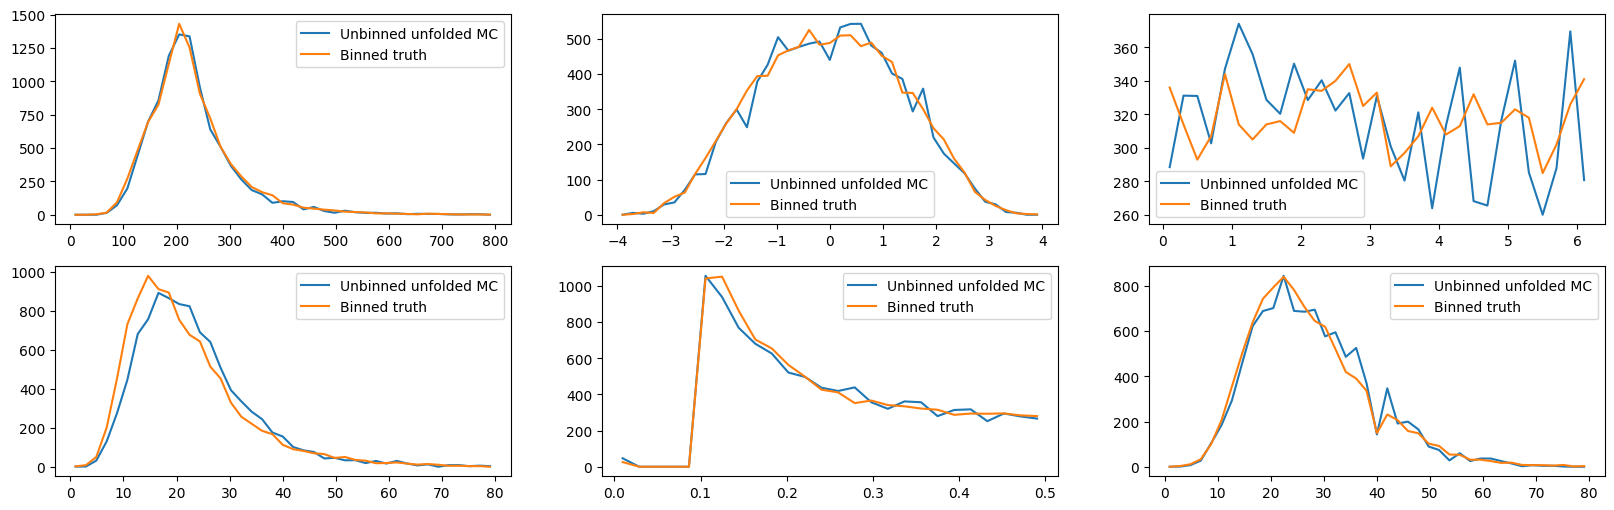

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(20,6))

iteration_to_plot = num_iterations - 1

bins = [
    [bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet],
    [bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet],
    [bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet],
    [bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet],
    [bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed],
    [bins_mult, bin_low_mult, bin_high_mult]
]

true_measured_hist = [
    (phi_Tjet_true_hist, phi_Tjet_measured_hist),
    (y_jet_true_hist, y_jet_measured_hist),
    (phi_jet_true_hist, phi_jet_measured_hist),
    (mass_jet_true_hist, mass_jet_measured_hist),
    (mass_groomed_true_hist, mass_groomed_measured_hist),
    (mult_jet_true_hist, mult_jet_measured_hist)
]

for i,axs in enumerate(axes.ravel()):

    unbinned_weights, MC_entries_unbinned, sim_entries_unbinned, pass_reco_mask_unbinned = unbinned_results[i]

    omnifold_MC_hist_unbinned, omnifold_MC_bin_edges_unbinned = np.histogram(
        MC_entries_unbinned.flatten(),
        weights = unbinned_weights[iteration_to_plot, 1],
        bins = bins[i][0],
        range = [bins[i][1], bins[i][2]]
    )
    omnifold_MC_bin_centers_unbinned = (omnifold_MC_bin_edges_unbinned[:-1] + omnifold_MC_bin_edges_unbinned[1:]) / 2

    axs.plot(omnifold_MC_bin_centers_unbinned, omnifold_MC_hist_unbinned, label = "Unbinned unfolded MC")
    truth_counts, truth_bin_centers = dh.TH1_to_numpy(true_measured_hist[i][0])
    axs.plot(truth_bin_centers, truth_counts, label = "Binned truth")

    axs.legend()

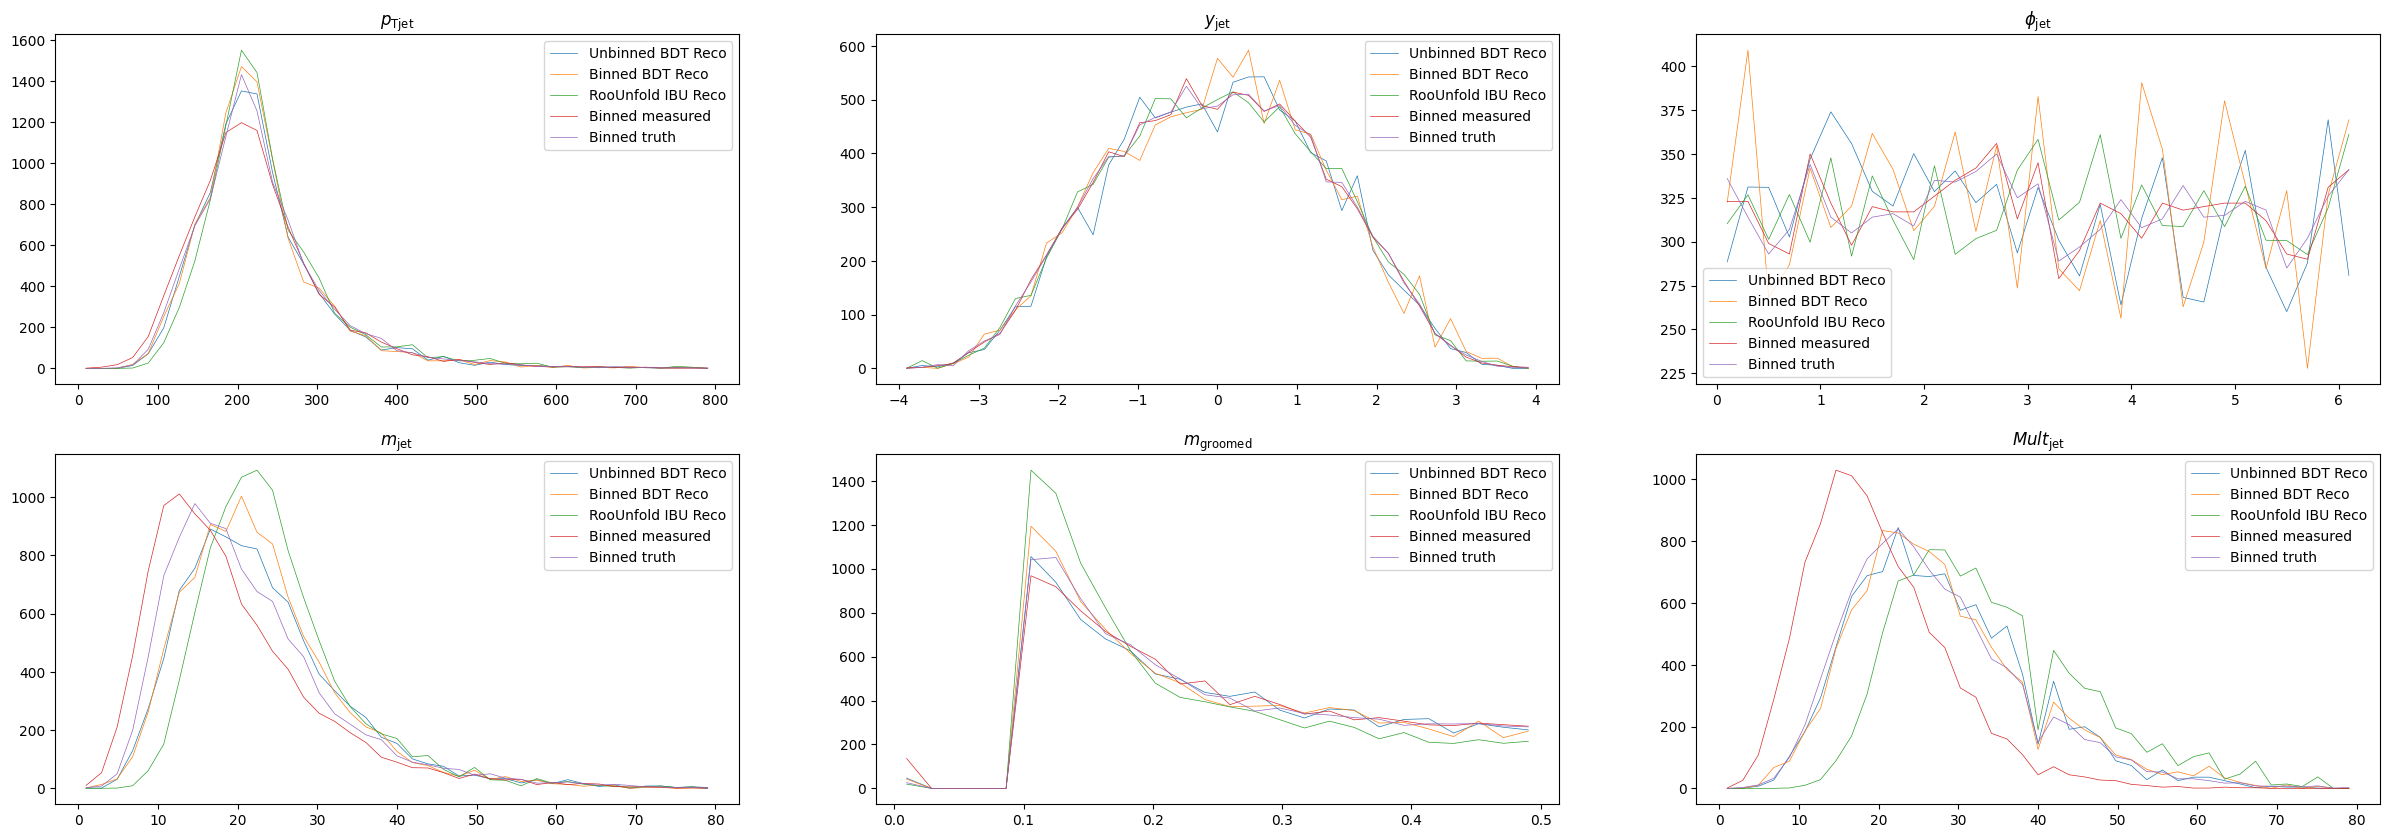

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(30,10))

iteration_to_plot = num_iterations - 1

bins = [
    [bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet],
    [bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet],
    [bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet],
    [bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet],
    [bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed],
    [bins_mult, bin_low_mult, bin_high_mult]
]

true_measured_hist = [
    (phi_Tjet_true_hist, phi_Tjet_measured_hist),
    (y_jet_true_hist, y_jet_measured_hist),
    (phi_jet_true_hist, phi_jet_measured_hist),
    (mass_jet_true_hist, mass_jet_measured_hist),
    (mass_groomed_true_hist, mass_groomed_measured_hist),
    (mult_jet_true_hist, mult_jet_measured_hist)
]

for i,axs in enumerate(axes.ravel()):

    unbinned_weights, MC_entries_unbinned, sim_entries_unbinned, pass_reco_mask_unbinned = unbinned_results[i]

    omnifold_sim_hist_unbinned, omnifold_sim_bin_edges_unbinned = np.histogram(
        MC_entries_unbinned.flatten(),
        weights = unbinned_weights[iteration_to_plot, 1],
        bins = bins[i][0],
        range = [bins[i][1], bins[i][2]]
    )
    omnifold_sim_bin_centers_unbinned = (omnifold_sim_bin_edges_unbinned[:-1] + omnifold_sim_bin_edges_unbinned[1:]) / 2

    truth_counts, truth_bin_centers = dh.TH1_to_numpy(true_measured_hist[i][0])
    measured_counts, measured_bin_centers = dh.TH1_to_numpy(true_measured_hist[i][1])

    axs.plot(omnifold_sim_bin_centers_unbinned, omnifold_sim_hist_unbinned, label = "Unbinned BDT Reco", linewidth=0.5)
    axs.plot(binned_results[i][1], binned_results[i][0], label = "Binned BDT Reco", linewidth=0.5)
    axs.plot(IBU_data[i][1], IBU_data[i][0], label = "RooUnfold IBU Reco", linewidth=0.5)
    axs.plot(measured_bin_centers, measured_counts, label = "Binned measured", linewidth=0.5)
    axs.plot(truth_bin_centers, truth_counts, label = "Binned truth", linewidth=0.5)

    axs.title.set_text(labels[i])

    axs.legend()

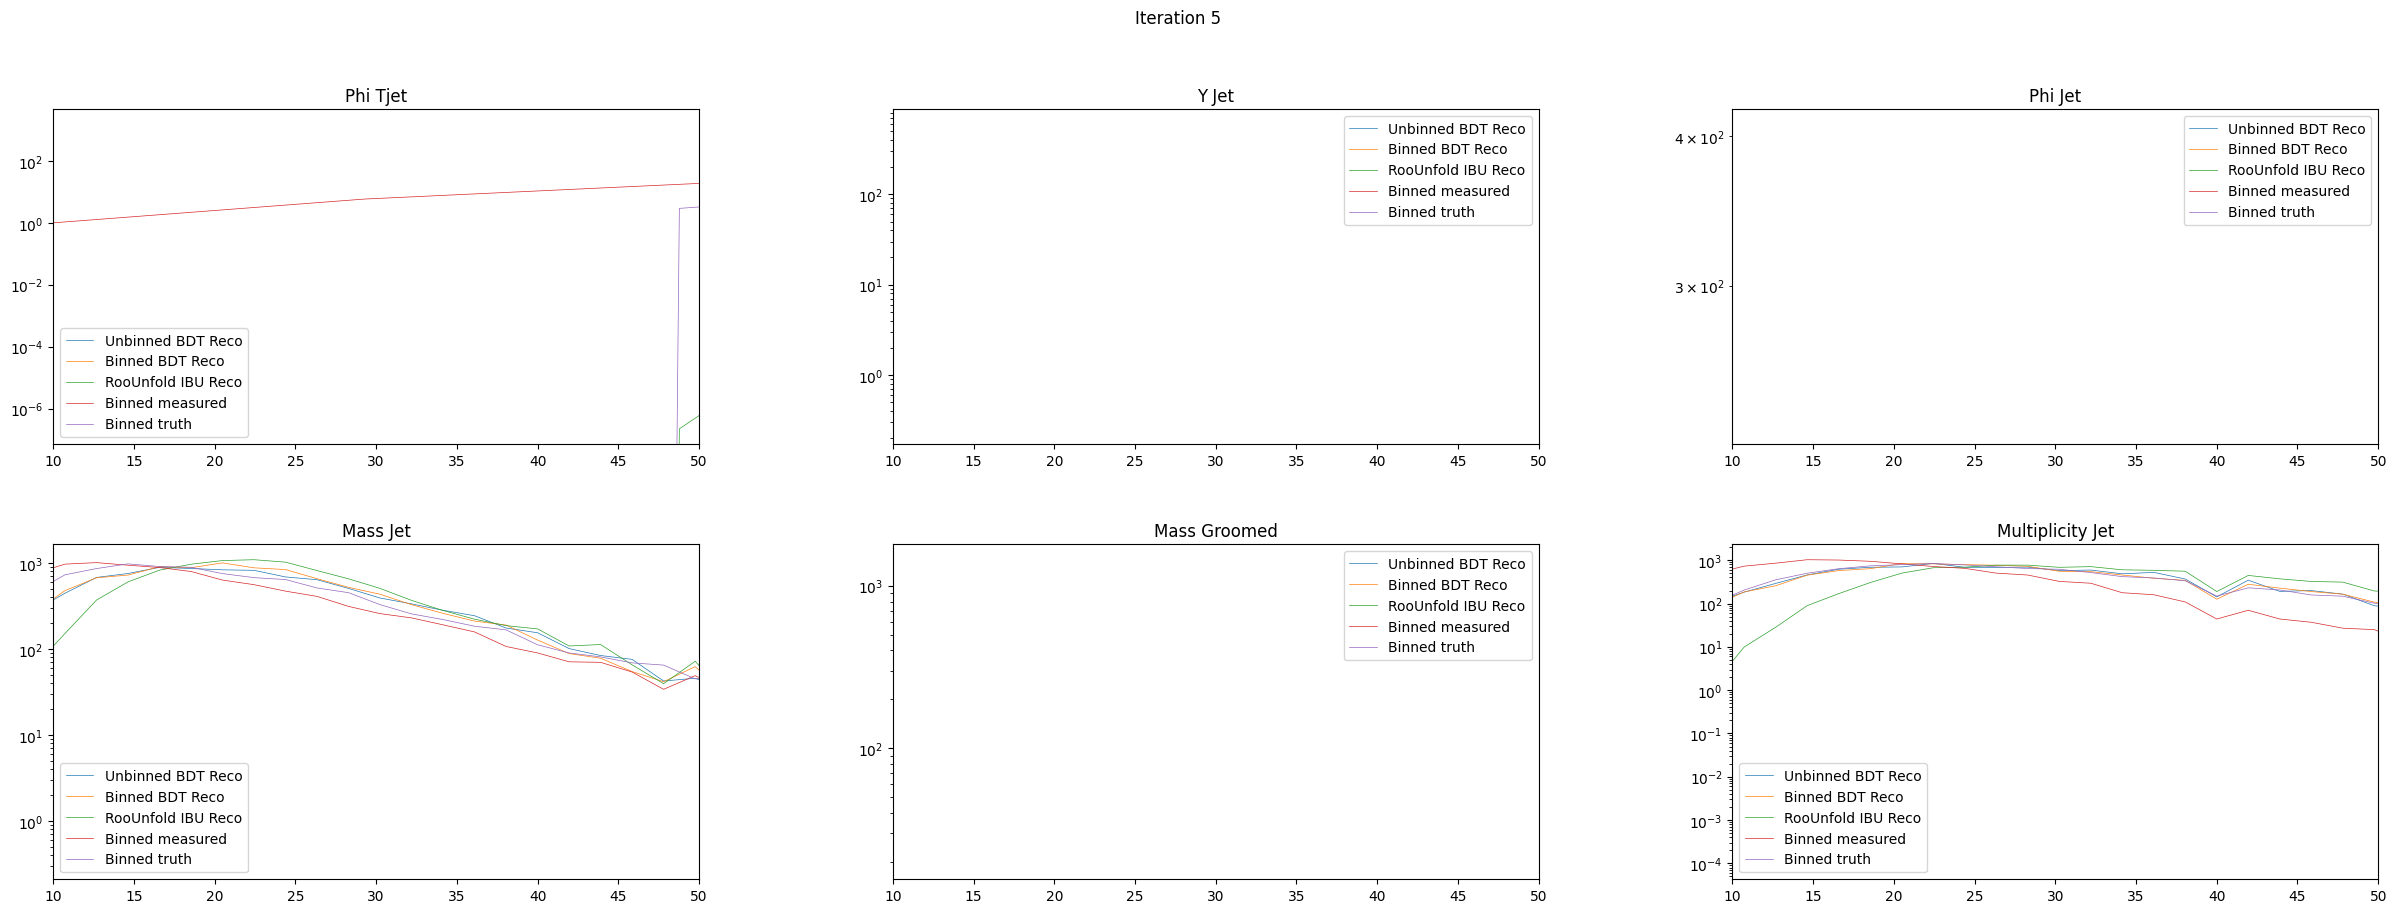

In [21]:

fig, axes = plt.subplots(2, 3, figsize=(30, 10))

iteration_to_plot = num_iterations - 1

bins = [
    [bins_phi_Tjet, bin_low_phi_Tjet, bin_high_phi_Tjet],
    [bins_y_jet, bin_low_y_Tjet, bin_high_y_Tjet],
    [bins_phi_jet, bin_low_phi_jet, bin_high_phi_jet],
    [bins_mass_jet, bin_low_mass_jet, bin_high_mass_jet],
    [bins_mass_groomed, bin_low_mass_groomed, bin_high_mass_groomed],
    [bins_mult, bin_low_mult, bin_high_mult]
]

true_measured_hist = [
    (phi_Tjet_true_hist, phi_Tjet_measured_hist),
    (y_jet_true_hist, y_jet_measured_hist),
    (phi_jet_true_hist, phi_jet_measured_hist),
    (mass_jet_true_hist, mass_jet_measured_hist),
    (mass_groomed_true_hist, mass_groomed_measured_hist),
    (mult_jet_true_hist, mult_jet_measured_hist)
]

labels = [
    "Phi Tjet",
    "Y Jet",
    "Phi Jet",
    "Mass Jet",
    "Mass Groomed",
    "Multiplicity Jet"
]

for i, axs in enumerate(axes.ravel()):

    unbinned_weights, MC_entries_unbinned, sim_entries_unbinned, pass_reco_mask_unbinned = unbinned_results[i]

    omnifold_sim_hist_unbinned, omnifold_sim_bin_edges_unbinned = np.histogram(
        MC_entries_unbinned.flatten(),
        weights=unbinned_weights[iteration_to_plot, 1],
        bins=bins[i][0],
        range=[bins[i][1], bins[i][2]]
    )
    omnifold_sim_bin_centers_unbinned = (omnifold_sim_bin_edges_unbinned[:-1] + omnifold_sim_bin_edges_unbinned[1:]) / 2

    truth_counts, truth_bin_centers = dh.TH1_to_numpy(true_measured_hist[i][0])
    measured_counts, measured_bin_centers = dh.TH1_to_numpy(true_measured_hist[i][1])

    axs.plot(omnifold_sim_bin_centers_unbinned, omnifold_sim_hist_unbinned, label="Unbinned BDT Reco", linewidth=0.5)
    axs.plot(binned_results[i][1], binned_results[i][0], label="Binned BDT Reco", linewidth=0.5)
    axs.plot(IBU_data[i][1], IBU_data[i][0], label="RooUnfold IBU Reco", linewidth=0.5)
    axs.plot(measured_bin_centers, measured_counts, label="Binned measured", linewidth=0.5)
    axs.plot(truth_bin_centers, truth_counts, label="Binned truth", linewidth=0.5)

    axs.set_yscale('log')
    axs.set_xlim(10, 50)
    axs.title.set_text(labels[i])
    axs.legend()

plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle(f"Iteration {iteration_to_plot + 1}")
plt.show()